# 2. Manejo de información geo-referenciada

Debe trabajar con información cartográfica del Censo 2017. El archivo shapefile respectivo está en la carpeta 5 Informacion Cartografica Shape. La información geográfica de los centros de salud mental para Lima está en el excel Salud mental peru.xls.

### 2.1. Subir la base de datos de las manzanas en formate GeodataFrame. Crear los centroides de las manzanas

In [4]:
#import packages

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 


In [5]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString, Polygon, MultiPoint
from shapely import wkt

In [6]:
# pip install xlrd 

In [7]:
#get districts names

distritos = ['ATE','BARRANCO','BREÑA', 'CALLAO', 'CARABAYLLO','CHORRILLOS','COMAS','EL_AGUSTINO','INDEPENDENCIA',
           'JESUS_MARIA','LA_MOLINA_LIMA','LA_VICTORIA','LIMA','LINCE','LOS_OLIVOS_LIMA','MAGDALENA_DEL_MAR',
           'MIRAFLORES','PUEBLO_LIBRE','PUENTE_PIEDRA', 'RIMAC_LIMA','SAN_BORJA','SAN_ISIDRO','SAN_JUAN_DE_LURIGANCHO','SAN_JUAN_DE_MIRAFLORES','SAN_LUIS',
            'SAN_MARTIN_DE_PORRES','SAN_MIGUEL','SANTA_ANITA','SURCO','VILLA_EL_SALVADOR','VILLA_MARIA_DEL_TRIUNFO']

In [32]:
#import data "5_Informacion_Cartografica-Shape"

data = r"../../data/Trabajo_final/5_Informacion_Cartografica-Shape/" 
 

i = 0

for j in distritos:
        i = i + 1
        globals()[f'manzana{i}']  = gpd.read_file(f'{data}{j}/{j}.shp')
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'][['Mz','geometry','UBIGEO']]
        globals()[f'manzana{i}']  = globals()[f'manzana{i}'].rename(columns = {"Mz":"id_manzana"})   
    
mapa = manzana1.copy()

for k in range(2,i+1):
    mapa = mapa.append(globals()[f'manzana{k}'] , ignore_index=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16908\333670943.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mapa = mapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16908\333670943.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mapa = mapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16908\333670943.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mapa = mapa.append(globals()[f'manzana{k}'] , ignore_index=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16908\333670943.py:17: FutureWarning: The frame.append method is deprecated and will be rem

In [33]:
mapa = gpd.GeoDataFrame(mapa, geometry = "geometry", crs='24891')
mapa

,id_manzana,geometry,UBIGEO
0,150103000108200012,"POLYGON ((-76.822 -12.033, -76.822 -12.033, -7...",150103
1,150103000104101040,"POLYGON ((-76.891 -12.025, -76.891 -12.026, -7...",150103
2,150103000101800006,"POLYGON ((-76.920 -12.042, -76.920 -12.042, -7...",150103
3,150103000102900018,"POLYGON ((-76.923 -12.025, -76.922 -12.025, -7...",150103
4,150103000103800056,"POLYGON ((-76.893 -12.034, -76.893 -12.034, -7...",150103
...,...,...,...
87854,150143000103400036D,"POLYGON ((-76.937 -12.169, -76.937 -12.169, -7...",150143
87855,150143000104600043L,"POLYGON ((-76.918 -12.166, -76.918 -12.166, -7...",150143
87856,150143000106800020,"POLYGON ((-76.914 -12.207, -76.914 -12.207, -7...",150143
87857,150143000108000026,"POLYGON ((-76.909 -12.225, -76.909 -12.225, -7...",150143


In [34]:
# get centroids

mapa['centroids'] = mapa.centroid
mapa

,id_manzana,geometry,UBIGEO,centroids
0,150103000108200012,"POLYGON ((-76.822 -12.033, -76.822 -12.033, -7...",150103,POINT (-76.822 -12.033)
1,150103000104101040,"POLYGON ((-76.891 -12.025, -76.891 -12.026, -7...",150103,POINT (-76.891 -12.026)
2,150103000101800006,"POLYGON ((-76.920 -12.042, -76.920 -12.042, -7...",150103,POINT (-76.920 -12.042)
3,150103000102900018,"POLYGON ((-76.923 -12.025, -76.922 -12.025, -7...",150103,POINT (-76.923 -12.025)
4,150103000103800056,"POLYGON ((-76.893 -12.034, -76.893 -12.034, -7...",150103,POINT (-76.893 -12.034)
...,...,...,...,...
87854,150143000103400036D,"POLYGON ((-76.937 -12.169, -76.937 -12.169, -7...",150143,POINT (-76.937 -12.169)
87855,150143000104600043L,"POLYGON ((-76.918 -12.166, -76.918 -12.166, -7...",150143,POINT (-76.918 -12.167)
87856,150143000106800020,"POLYGON ((-76.914 -12.207, -76.914 -12.207, -7...",150143,POINT (-76.914 -12.207)
87857,150143000108000026,"POLYGON ((-76.909 -12.225, -76.909 -12.225, -7...",150143,POINT (-76.909 -12.225)


In [35]:
mapa2 = gpd.GeoDataFrame(mapa, geometry='geometry', crs='24891')
mapa2 = mapa2.rename(columns={'centroids' : 'Mz centroids'})
mapa2

,id_manzana,geometry,UBIGEO,Mz centroids
0,150103000108200012,"POLYGON ((-76.822 -12.033, -76.822 -12.033, -7...",150103,POINT (-76.822 -12.033)
1,150103000104101040,"POLYGON ((-76.891 -12.025, -76.891 -12.026, -7...",150103,POINT (-76.891 -12.026)
2,150103000101800006,"POLYGON ((-76.920 -12.042, -76.920 -12.042, -7...",150103,POINT (-76.920 -12.042)
3,150103000102900018,"POLYGON ((-76.923 -12.025, -76.922 -12.025, -7...",150103,POINT (-76.923 -12.025)
4,150103000103800056,"POLYGON ((-76.893 -12.034, -76.893 -12.034, -7...",150103,POINT (-76.893 -12.034)
...,...,...,...,...
87854,150143000103400036D,"POLYGON ((-76.937 -12.169, -76.937 -12.169, -7...",150143,POINT (-76.937 -12.169)
87855,150143000104600043L,"POLYGON ((-76.918 -12.166, -76.918 -12.166, -7...",150143,POINT (-76.918 -12.167)
87856,150143000106800020,"POLYGON ((-76.914 -12.207, -76.914 -12.207, -7...",150143,POINT (-76.914 -12.207)
87857,150143000108000026,"POLYGON ((-76.909 -12.225, -76.909 -12.225, -7...",150143,POINT (-76.909 -12.225)


In [36]:
mapa2['UBIGEO']=mapa2['UBIGEO'].astype(int)
mapa2['UBIGEO']

0        150103
1        150103
2        150103
3        150103
4        150103
          ...  
87854    150143
87855    150143
87856    150143
87857    150143
87858    150143
Name: UBIGEO, Length: 87859, dtype: int32

In [37]:
#Import data "Salud_mental_peru"

salud_mental = pd.read_excel(r'../../data/Trabajo_final/Salud_mental_peru.xls')


In [38]:
salud_mental

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496


In [39]:
# Centros de Salud de Lima

# DataFrame to GeoDataFrame 

salud = gpd.GeoDataFrame(salud_mental, geometry=gpd.points_from_xy( salud_mental.long_original, salud_mental.lat_original ) )
salud

,Institución,Departamento,Provincia,Distrito,UBIGEO,lat_original,long_original,geometry
0,MINSA,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,-12.017282,-77.00095,POINT (-77.00095 -12.01728)
1,MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,-12.136658,-76.9482472,POINT (-76.94825 -12.13666)
2,MINSA,LIMA,LIMA,SAN BORJA,150130,-12.107663,-76.999385,POINT (-76.99939 -12.10766)
3,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.062212,-77.005597,POINT (-77.00560 -12.06221)
4,MINSA,LIMA,LIMA,CERCADO DE LIMA,150101,-12.066349,-77.035523,POINT (-77.03552 -12.06635)
5,MINSA,LIMA,LIMA,PUNTA HERMOZA,150126,-12.333766,-76.823147,POINT (-76.82315 -12.33377)
6,MINSA,LIMA,LIMA,RIMAC,150128,-12.029416,-77.02954497,POINT (-77.02954 -12.02942)
7,MINSA,LIMA,LIMA,COMAS,150110,-11.934511,-77.0456523,POINT (-77.04565 -11.93451)
8,MINSA,LIMA,LIMA,VILLA EL SALVADOR,150142,-12.186086,-76.9644885,POINT (-76.96449 -12.18609)
9,MINSA,LIMA,LIMA,LA VICTORIA,150115,-12.071416,-77.01337496,POINT (-77.01337 -12.07142)


In [40]:
salud['UBIGEO']=salud['UBIGEO'].astype(int)
salud['UBIGEO']

0     150132
1     150143
2     150130
3     150115
4     150101
5     150126
6     150128
7     150110
8     150142
9     150115
10    150117
11    150123
12    150103
13    150111
14    150114
15    150109
16    150102
17    150135
18    150108
19    150125
20    150108
21    150142
22    150132
23    150106
24    150101
25    150108
26    150121
27    150137
28    150104
29    150143
30    150142
31    150103
32    150106
33    150125
34    150123
35    150132
36    150133
37    150111
Name: UBIGEO, dtype: int32

In [19]:
mapa3 = mapa2.merge( salud, how="inner", on = 'UBIGEO')
mapa3

,id_manzana,geometry_x,UBIGEO,Mz centroids,Institución,Departamento,Provincia,Distrito,lat_original,long_original,geometry_y
0,150103000108200012,"POLYGON ((-76.822 -12.033, -76.822 -12.033, -7...",150103,POINT (-76.822 -12.033),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674)
1,150103000108200012,"POLYGON ((-76.822 -12.033, -76.822 -12.033, -7...",150103,POINT (-76.822 -12.033),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581)
2,150103000104101040,"POLYGON ((-76.891 -12.025, -76.891 -12.026, -7...",150103,POINT (-76.891 -12.026),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674)
3,150103000104101040,"POLYGON ((-76.891 -12.025, -76.891 -12.026, -7...",150103,POINT (-76.891 -12.026),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581)
4,150103000101800006,"POLYGON ((-76.920 -12.042, -76.920 -12.042, -7...",150103,POINT (-76.920 -12.042),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674)
...,...,...,...,...,...,...,...,...,...,...,...
141096,150143000106800020,"POLYGON ((-76.914 -12.207, -76.914 -12.207, -7...",150143,POINT (-76.914 -12.207),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157)
141097,150143000108000026,"POLYGON ((-76.909 -12.225, -76.909 -12.225, -7...",150143,POINT (-76.909 -12.225),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666)
141098,150143000108000026,"POLYGON ((-76.909 -12.225, -76.909 -12.225, -7...",150143,POINT (-76.909 -12.225),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157)
141099,150143000108000045,"POLYGON ((-76.912 -12.222, -76.912 -12.222, -7...",150143,POINT (-76.912 -12.222),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666)


###  2.2. Crear una variable dummy llamado Treatment que toma el valor de 1 si el centroide de la manzana se ubica a menos de 1 km de algun centro de salud mental

In [52]:
#get distance

pt1 = gpd.GeoDataFrame({'geometry': mapa3['Mz centroids']}, crs='24891') 
pt2 = gpd.GeoDataFrame({'geometry': mapa3['geometry_y']}, crs='24891')

mapa3["Distancia"] = pt1.apply(lambda x: pt2.distance(x)) #calculate distance from pt1 to pt2
mapa3["Distancia_KM"] = mapa3["Distancia"] * 100  # get distance in Km
mapa3["Distancia_KM"]

0          1.660393
1         13.290503
2          6.689937
3          6.854386
4          9.790275
            ...    
141096     5.154321
141097     9.641126
141098     6.957537
141099     9.281867
141100     6.596187
Name: Distancia_KM, Length: 141101, dtype: float64

In [56]:
mapa3['Treatment'] = np.where(mapa3['Distancia_KM'] < 1, 1, 0)

mapa3['Treatment']

0         0
1         0
2         0
3         0
4         0
         ..
141096    0
141097    0
141098    0
141099    0
141100    0
Name: Treatment, Length: 141101, dtype: int32

### 2.3. Crear una dummy llamado Control que toma el valor de 1 si la manzana se ubica entre 1 a 2 km del centro de salud mental.

In [58]:
mapa3['Control'] = np.where((mapa3['Distancia_KM'] <= 2) & (mapa3['Distancia_KM'] >= 1), 1, 0)

mapa3['Control']

0         1
1         0
2         0
3         0
4         0
         ..
141096    0
141097    0
141098    0
141099    0
141100    0
Name: Control, Length: 141101, dtype: int32

### 2.4. Grafique las manzanas treatment en color rojo y en azul las manzanas de control. Mientras de color blanco o neutral, las manzanas que no son control o treatment. Usar como fondo de fondo de la imagen a Google maps. A nada una leyenda al gráfico y el siguiente titulo (Mental Health Center - treatment and control). Use hexbin para sombrear las manzanas tratadas, controles y neutrales.

In [23]:
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [59]:
Treatment1 = mapa3.loc[(mapa3['Treatment'].astype(str)).str.contains("1") ]
Treatment1

,id_manzana,geometry_x,UBIGEO,Mz centroids,Institución,Departamento,Provincia,Distrito,lat_original,long_original,geometry_y,Distancia,Treatment,Control,Distancia_KM
30,150103000107200054,"POLYGON ((-76.821 -12.016, -76.821 -12.016, -7...",150103,POINT (-76.821 -12.016),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.003664,1,0,0.366407
51,150103000101100039,"POLYGON ((-76.957 -12.059, -76.957 -12.059, -7...",150103,POINT (-76.958 -12.059),MINSA,LIMA,LIMA,ATE,-12.055808,-76.9528728,POINT (-76.95287 -12.05581),0.006121,1,0,0.612093
66,150103000107500005D,"POLYGON ((-76.827 -12.022, -76.827 -12.022, -7...",150103,POINT (-76.827 -12.022),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.005876,1,0,0.587570
96,150103000105400057,"POLYGON ((-76.829 -12.008, -76.829 -12.007, -7...",150103,POINT (-76.829 -12.008),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.009499,1,0,0.949890
100,150103000107800002J,"POLYGON ((-76.828 -12.026, -76.828 -12.026, -7...",150103,POINT (-76.827 -12.026),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.009815,1,0,0.981495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141071,150143000102100003A,"POLYGON ((-76.944 -12.145, -76.945 -12.146, -7...",150143,POINT (-76.945 -12.146),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.009532,1,0,0.953153
141076,150143000103300004,"POLYGON ((-76.946 -12.164, -76.945 -12.164, -7...",150143,POINT (-76.945 -12.164),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.007750,1,0,0.775031
141077,150143000100300028F,"POLYGON ((-76.950 -12.134, -76.950 -12.135, -7...",150143,POINT (-76.950 -12.134),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.003014,1,0,0.301392
141081,150143000101000027,"POLYGON ((-76.947 -12.144, -76.947 -12.144, -7...",150143,POINT (-76.947 -12.144),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.007478,1,0,0.747760


In [60]:
control1 = mapa3.loc[(mapa3['Control'].astype(str)).str.contains("1") ]
control1

,id_manzana,geometry_x,UBIGEO,Mz centroids,Institución,Departamento,Provincia,Distrito,lat_original,long_original,geometry_y,Distancia,Treatment,Control,Distancia_KM
0,150103000108200012,"POLYGON ((-76.822 -12.033, -76.822 -12.033, -7...",150103,POINT (-76.822 -12.033),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.016604,0,1,1.660393
14,150103000106400045N,"POLYGON ((-76.814 -12.010, -76.814 -12.010, -7...",150103,POINT (-76.814 -12.010),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.012967,0,1,1.296656
26,150103000105100039,"POLYGON ((-76.836 -12.023, -76.836 -12.023, -7...",150103,POINT (-76.836 -12.024),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.012918,0,1,1.291758
38,150103000106900019A,"POLYGON ((-76.814 -12.022, -76.814 -12.023, -7...",150103,POINT (-76.814 -12.023),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.012649,0,1,1.264890
40,150103000105500044,"POLYGON ((-76.835 -12.001, -76.834 -12.001, -7...",150103,POINT (-76.834 -12.001),MINSA,LIMA,LIMA,ATE,-12.016739,-76.82504094,POINT (-76.82504 -12.01674),0.017881,0,1,1.788127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141072,150143000102100003A,"POLYGON ((-76.944 -12.145, -76.945 -12.146, -7...",150143,POINT (-76.945 -12.146),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.017336,0,1,1.733617
141082,150143000101000027,"POLYGON ((-76.947 -12.144, -76.947 -12.144, -7...",150143,POINT (-76.947 -12.144),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.019640,0,1,1.963962
141085,150143000101100024B,"POLYGON ((-76.957 -12.143, -76.957 -12.143, -7...",150143,POINT (-76.957 -12.143),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.136658,-76.9482472,POINT (-76.94825 -12.13666),0.010697,0,1,1.069683
141088,150143000102900043B,"POLYGON ((-76.951 -12.161, -76.951 -12.160, -7...",150143,POINT (-76.951 -12.161),MINSA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,-12.161575,-76.9382139,POINT (-76.93821 -12.16157),0.012654,0,1,1.265443


In [61]:
mapa3['Neutral'] = np.where(mapa3['Distancia_KM'] >2, 1, 0)
mapa3['Neutral']

0         0
1         1
2         1
3         1
4         1
         ..
141096    1
141097    1
141098    1
141099    1
141100    1
Name: Neutral, Length: 141101, dtype: int32

TypeError: 'value' must be an instance of str or bytes, not a float

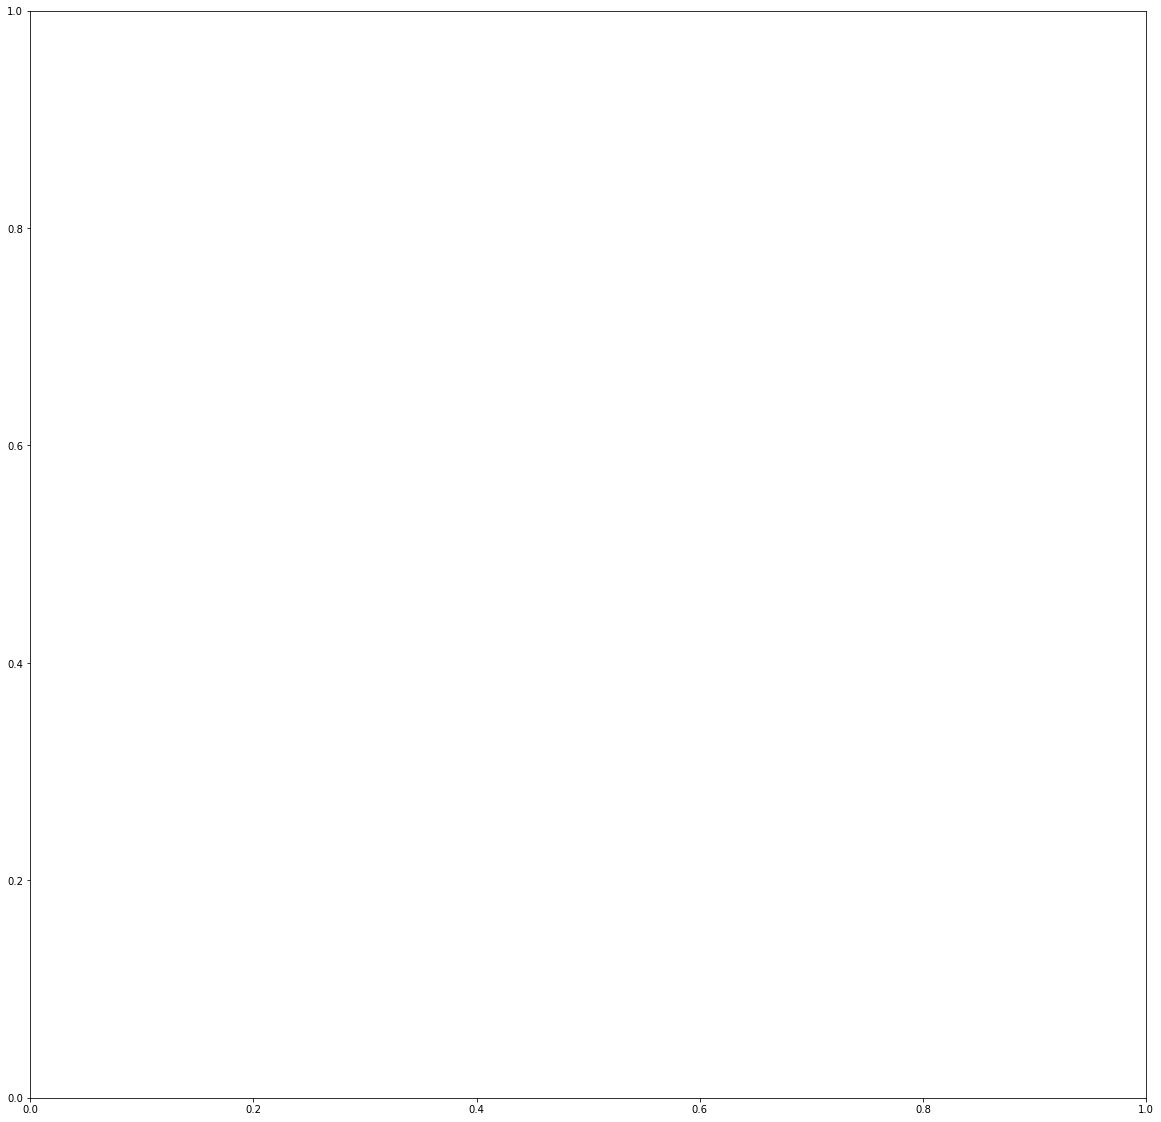

In [71]:
f, ax = plt.subplots(1, figsize=(20,20))


T_1 = ax.hexbin(mapa3.lat_original, mapa3.long_original, C = mapa3.Treatment, gridsize=100, alpha=1, linewidths = 1, cmap='reds', edgecolors = 'red', label = 'Treatment')
C_1 = ax.hexbin(mapa3.lat_original, mapa3.long_original, C = mapa3.Control, gridsize=100, alpha=1, linewidths = 1, cmap='blue', edgecolors = 'blue', label = 'Control')
N_1 = ax.hexbin(mapa3.lat_original, mapa3.long_original, C = mapa3.Neutral, gridsize=100, alpha=1, linewidths = 1, cmap='gray', edgecolors = 'black', label = 'Neutral')

cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.OpenStreetMap.Mapnik, zoom = 15)

plt.xticks([])
plt.yticks([])

plt.title('MENTAL HEALTH CENTER - treatment and control')
plt.legend(loc='upper right',frameon=True, bbox_to_anchor=(1, 1), prop={'size': 10})